# Análisis y Optimización del Marketing en Y.Afisha

## **Introducción**

Este proyecto se centra en el análisis de datos del sitio web Y.Afisha, con el objetivo de optimizar los gastos de marketing.

La empresa Y.Afisha ha proporcionado datos de registros del servidor, pedidos y estadísticas de gastos de marketing que abarcan desde enero de 2017 hasta diciembre de 2018.

## **Objetivos del proyecto**

**Comprender el Comportamiento del Usuario:**

- Analizar cómo los clientes utilizan el servicio, incluyendo la cantidad de personas que lo usan diariamente, semanalmente y mensualmente.
- Determinar la frecuencia con la que los usuarios regresan al sitio y la duración de sus sesiones.

**Evaluar el Rendimiento de las Ventas:**

- Identificar cuándo los usuarios comienzan a realizar compras y cuántos pedidos hacen durante un período de tiempo dado.
- Calcular el tamaño promedio de las compras y el valor de vida del cliente (LTV).

**Optimizar los Gastos de Marketing:**

- Analizar cuánto dinero se ha gastado en marketing total y por fuente de adquisición.
- Calcular el costo de adquisición de clientes (CAC) para cada fuente de anuncios.
- Evaluar la rentabilidad de las inversiones en marketing (ROMI).

## **Cargar Datos**

In [3]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
# Importar los archivos CSV
visits_log_us = pd.read_csv('/datasets/visits_log_us.csv')

orders_log_us = pd.read_csv('/datasets/orders_log_us.csv')

costs_us = pd.read_csv('/datasets/costs_us.csv')

In [5]:
# Encontrat el tamaño exacto de los datos agregando el parámetro memory_usage='deep' al método .info().
visits_log_us.info(memory_usage='deep')

visits_log_us.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 79.3 MB


Device               End Ts  Source Id             Start Ts  \
0    touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1  desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2    touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3  desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4  desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   

                    Uid  
0  16879256277535980062  
1    104060357244891740  
2   7459035603376831527  
3  16174680259334210214  
4   9969694820036681168

# Descripción de los Datos

- Este dataset contiene 359,400 registros y 5 columnas:
 - **Device:** Tipo de dispositivo utilizado (por ejemplo, 'touch', 'desktop').
 - **End Ts:** Fecha y hora de fin de la sesión.
 - **Source Id:** Identificador de la fuente de anuncios.
 - **Start Ts:** Fecha y hora de inicio de la sesión.
 - **Uid:** Identificador único del usuario.

- Todos los registros están completos, sin valores nulos.

- Los tipos de datos inicialmente incluyen object para fechas y int64 para identificadores.

In [6]:
# Encontrar el tamaño exacto de los datos agregando el parámetro memory_usage='deep' al método .info().
orders_log_us.info(memory_usage='deep')

orders_log_us.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 4.4 MB


Buy Ts  Revenue                   Uid
0  2017-06-01 00:10:00    17.00  10329302124590727494
1  2017-06-01 00:25:00     0.55  11627257723692907447
2  2017-06-01 00:27:00     0.37  17903680561304213844
3  2017-06-01 00:29:00     0.55  16109239769442553005
4  2017-06-01 07:58:00     0.37  14200605875248379450

# Descripción de los Datos

- Este dataset contiene información sobre los pedidos realizados en el sitio web durante el mismo período. Los detalles de las columnas son:

 - **Buy Ts:** Fecha y hora del pedido.
 - **Revenue:** Ingresos generados por el pedido.
 - **Uid:** Identificador único del usuario.
 
- El dataset contiene 50,415 registros sin valores nulos. La columnas Buy Ts es de tipo object, Revenue es de tipo float64, y Uid es de tipo uint64. 
- El tamaño del dataset es de aproximadamente 5.4 MB.

In [5]:
# Encontrar el tamaño exacto de los datos agregando el parámetro memory_usage='deep' al método .info()
costs_us.info(memory_usage='deep')

costs_us.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 206.2 KB


source_id          dt  costs
0          1  2017-06-01  75.20
1          1  2017-06-02  62.25
2          1  2017-06-03  36.53
3          1  2017-06-04  55.00
4          1  2017-06-05  57.08

# Descripción de los Datos

- Este dataset contiene 2,542 registros y 3 columnas:
 - **source_id:** Identificador de la fuente de anuncios.
 - **dt:** Fecha.
 - **costs:** Costos asociados a la fuente de anuncios en esa fecha.

Todos los registros están completos, sin valores nulos.
Los tipos de datos incluyen object para fechas y float64 para costos.

## **Preparar los datos** ##

In [6]:
# Convertir columna de object a category ya que usa menos espacio.
visits_log_us['Device'] = visits_log_us['Device'].astype('category')

# Convertir columnas de fechas a datetime
visits_log_us['Start Ts'] =  pd.to_datetime(visits_log_us['Start Ts'], format="%Y-%m-%d %H:%M:%S")
visits_log_us['End Ts'] =  pd.to_datetime(visits_log_us['End Ts'], format="%Y-%m-%d %H:%M:%S")

# Mostrar los cambios
visits_log_us.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [7]:
# Convertir columna de fecha a datetime
orders_log_us['Buy Ts'] =  pd.to_datetime(orders_log_us['Buy Ts'], format="%Y-%m-%d %H:%M:%S")

# Verificar los tipos de datos después de la conversión
print(orders_log_us.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None


In [8]:
# Convertir columna de fecha a datetime
costs_us['dt'] =  pd.to_datetime(costs_us['dt'], format="%Y-%m-%d %H:%M:%S")

# Verificar los tipos de datos después de la conversión
print(costs_us.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None


In [9]:
# Verificar datos duplicados
print(visits_log_us.duplicated().sum())
print(orders_log_us.duplicated().sum())
print(costs_us.duplicated().sum())

0
0
0


# Cambios Realizados en los Datasets

**visits_log_us:**

- Convertimos la columna Device de tipo object a category para ahorrar espacio de memoria.
- Convertimos las columnas de fechas (Start Ts y End Ts) de object a datetime64[ns] para facilitar el análisis temporal.

**orders_log_us:**

- Convertimos la columna de fecha Buy Ts de object a datetime64[ns] para mejorar la manipulación temporal.

**costs_us:**

- Convertimos la columna de fecha dt de object a datetime64[ns] para garantizar la coherencia en el análisis temporal.

**Verificación de Duplicados:**

- No se encontraron registros duplicados en ninguno de los datasets.

#### Conclusión 

Los datos se han optimizado y convertido adecuadamente para asegurar un análisis eficiente y preciso. Estos cambios permiten una mejor manipulación y análisis de las variables temporales, además de reducir el uso de memoria.

## **Visitas**

### ¿Cuántas personas lo usan cada día, semana y mes?

In [10]:
# Extraer el año de 'Start Ts'
visits_log_us['session_year']  = visits_log_us['Start Ts'].dt.year

# Extraer el mes de 'Start Ts'
visits_log_us['session_month']  = visits_log_us['Start Ts'].dt.month

# Extraer la semana del año de 'Start Ts'
visits_log_us['session_week']  = visits_log_us['Start Ts'].dt.week

# Extraer la fecha (día) de 'Start Ts'
visits_log_us['session_date'] = visits_log_us['Start Ts'].dt.date

visits_log_us.head()

Device              End Ts  Source Id            Start Ts  \
0    touch 2017-12-20 17:38:00          4 2017-12-20 17:20:00   
1  desktop 2018-02-19 17:21:00          2 2018-02-19 16:53:00   
2    touch 2017-07-01 01:54:00          5 2017-07-01 01:54:00   
3  desktop 2018-05-20 11:23:00          9 2018-05-20 10:59:00   
4  desktop 2017-12-27 14:06:00          3 2017-12-27 14:06:00   

                    Uid  session_year  session_month  session_week  \
0  16879256277535980062          2017             12            51   
1    104060357244891740          2018              2             8   
2   7459035603376831527          2017              7            26   
3  16174680259334210214          2018              5            20   
4   9969694820036681168          2017             12            52   

  session_date  
0   2017-12-20  
1   2018-02-19  
2   2017-07-01  
3   2018-05-20  
4   2017-12-27

In [11]:
# Convertir columna de fecha a datetime
visits_log_us['session_date'] =  pd.to_datetime(visits_log_us['session_date'], format="%Y-%m-%d %H:%M:%S")

# Verificar los tipos de datos después de la conversión
print(visits_log_us.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Device         359400 non-null  category      
 1   End Ts         359400 non-null  datetime64[ns]
 2   Source Id      359400 non-null  int64         
 3   Start Ts       359400 non-null  datetime64[ns]
 4   Uid            359400 non-null  uint64        
 5   session_year   359400 non-null  int64         
 6   session_month  359400 non-null  int64         
 7   session_week   359400 non-null  int64         
 8   session_date   359400 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](3), int64(4), uint64(1)
memory usage: 22.3 MB
None


In [12]:
# Calcular MAU (usuarios únicos mensuales)
mau_total = (
    visits_log_us.groupby(['session_year', 'session_month'])
    .agg({'Uid': 'nunique'})
    .mean()
)

# Calcular DAU (usuarios únicos diarios)
dau_total = visits_log_us.groupby('session_date').agg({'Uid': 'nunique'}).mean()

# Calcular WAU (usuarios únicos semanales)
wau_total = (
    visits_log_us.groupby(['session_year', 'session_week'])
    .agg({'Uid': 'nunique'})
    .mean()
)

print(int(mau_total))
print(int(dau_total))
print(int(wau_total))

23228
907
5716


In [13]:
# Calcular Sticky Factor (DAU/WAU y DAU/MAU)
sticky_wau = dau_total / wau_total * 100
print(sticky_wau)
sticky_mau = dau_total / mau_total * 100
print(sticky_mau)

Uid    15.884409
dtype: float64
Uid    3.90897
dtype: float64


# Hallazgos

**Interpretación de los Resultados**

- **DAU**: En promedio, 907 usuarios únicos utilizan el servicio cada día.
- **WAU**: En promedio, 5716 usuarios únicos utilizan el servicio cada semana.
- **MAU**: En promedio, 23228 usuarios únicos utilizan el servicio cada mes.
- **Sticky Factor (DAU/WAU**): Indica que aproximadamente el 15.88% de los usuarios que están activos semanalmente también están activos diariamente. Esto sugiere una buena lealtad a nivel semanal.
- **Sticky Factor (DAU/MAU)**: Indica que aproximadamente el 3.91% de los usuarios que están activos mensualmente también están activos diariamente. Esto sugiere que hay una mayor variabilidad en la frecuencia de uso entre los usuarios mensuales.

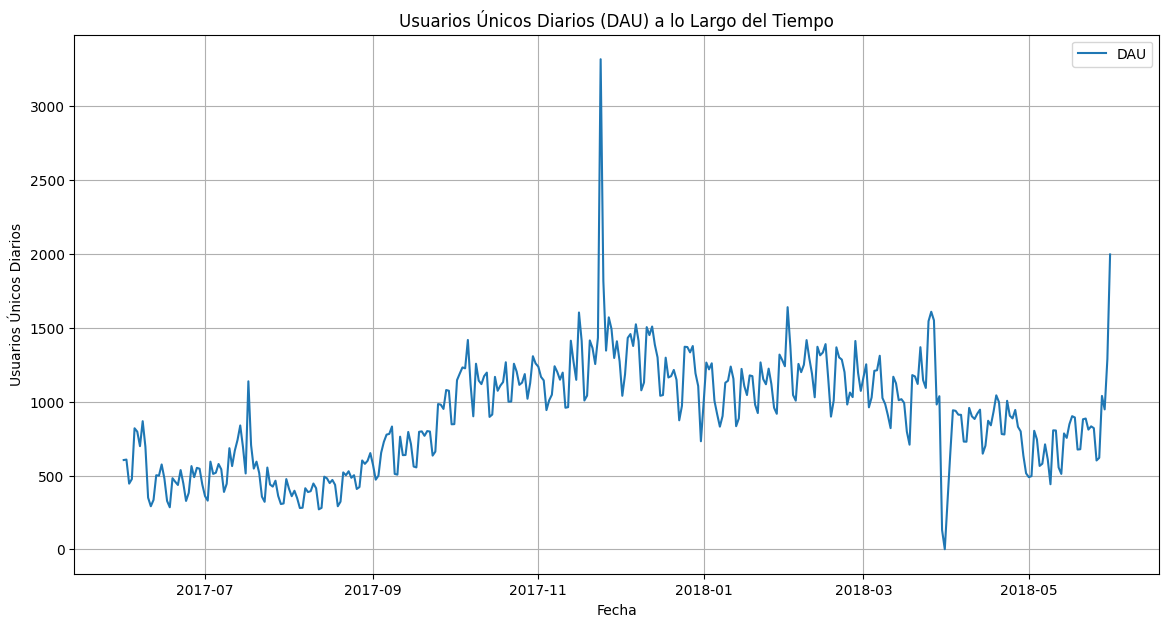

In [14]:
# Calcular DAU a lo largo del tiempo
dau_by_date = visits_log_us.groupby('session_date').agg({'Uid': 'nunique'}).reset_index()

plt.figure(figsize=(14, 7))
plt.plot(dau_by_date['session_date'], dau_by_date['Uid'], label='DAU')
plt.title('Usuarios Únicos Diarios (DAU) a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Usuarios Únicos Diarios')
plt.legend()
plt.grid(True)
plt.show()

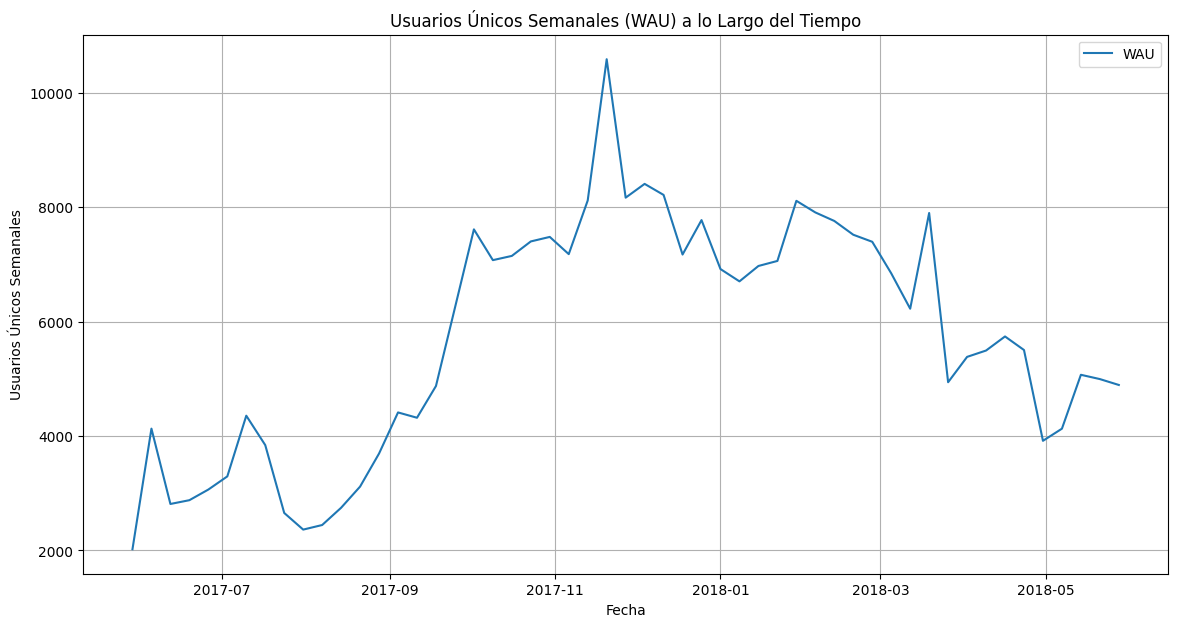

In [15]:
# Calcular WAU a lo largo del tiempo
wau_by_week = visits_log_us.groupby(['session_year', 'session_week']).agg({'Uid': 'nunique'}).reset_index()

# Convertir semana del año a formato de fecha
wau_by_week['week_start_date'] = pd.to_datetime(wau_by_week['session_year'].astype(str) + '-W' + wau_by_week['session_week'].astype(str) + '-1', format="%Y-W%W-%w")

plt.figure(figsize=(14, 7))
plt.plot(wau_by_week['week_start_date'], wau_by_week['Uid'], label='WAU')
plt.title('Usuarios Únicos Semanales (WAU) a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Usuarios Únicos Semanales')
plt.legend()
plt.grid(True)
plt.show()

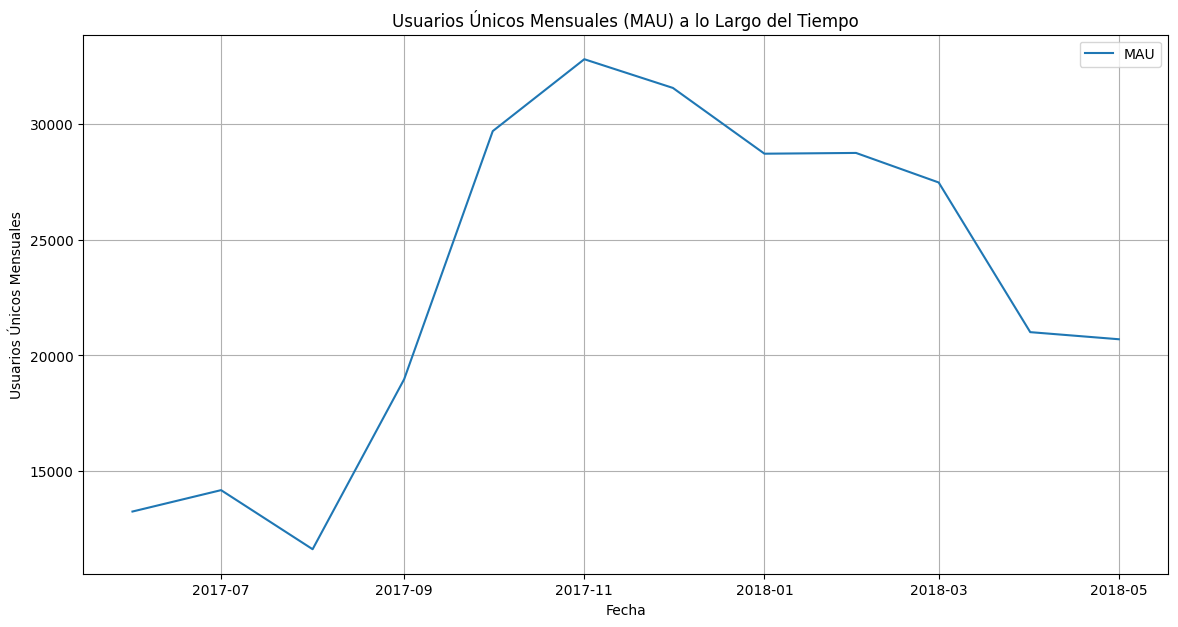

In [16]:
# Calcular MAU a lo largo del tiempo
mau_by_month = visits_log_us.groupby(['session_year', 'session_month']).agg({'Uid': 'nunique'}).reset_index()

# Convertir año y mes a formato de fecha
mau_by_month['month_start_date'] = pd.to_datetime(mau_by_month['session_year'].astype(str) + '-' + mau_by_month['session_month'].astype(str) + '-01')

plt.figure(figsize=(14, 7))
plt.plot(mau_by_month['month_start_date'], mau_by_month['Uid'], label='MAU')
plt.title('Usuarios Únicos Mensuales (MAU) a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Usuarios Únicos Mensuales')
plt.legend()
plt.grid(True)
plt.show()

### ¿Cuántas sesiones hay por día? 

In [17]:
# Calcular el número de sesiones y usuarios únicos por día
sessions_per_day = visits_log_us.groupby('session_date').agg(
    {'Uid': ['count', 'nunique']}
).reset_index()

# Renombrar las columnas para mayor claridad
sessions_per_day.columns = ['session_date', 'n_sessions', 'n_users']

# Calcular el promedio de sesiones por usuario por día
sessions_per_day['sess_per_user'] = sessions_per_day['n_sessions'] / sessions_per_day['n_users']

print(sessions_per_day)

    session_date  n_sessions  n_users  sess_per_user
0     2017-06-01         664      605       1.097521
1     2017-06-02         658      608       1.082237
2     2017-06-03         477      445       1.071910
3     2017-06-04         510      476       1.071429
4     2017-06-05         893      820       1.089024
..           ...         ...      ...            ...
359   2018-05-27         672      620       1.083871
360   2018-05-28        1156     1039       1.112608
361   2018-05-29        1035      948       1.091772
362   2018-05-30        1410     1289       1.093871
363   2018-05-31        2256     1997       1.129695

[364 rows x 4 columns]


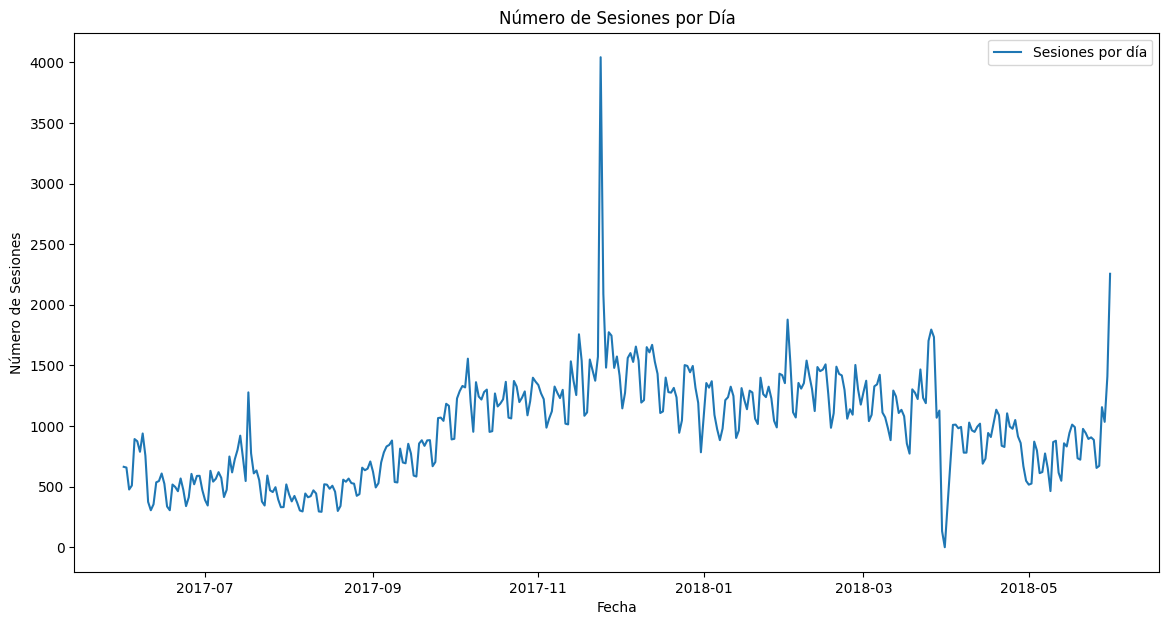

In [18]:
# Gráfico de sesiones por día
plt.figure(figsize=(14, 7))
plt.plot(sessions_per_day['session_date'], sessions_per_day['n_sessions'], label='Sesiones por día')
plt.title('Número de Sesiones por Día')
plt.xlabel('Fecha')
plt.ylabel('Número de Sesiones')
plt.legend()
plt.show()

In [19]:
# Calcular la media de las sesiones por día
mean_sessions_per_day = sessions_per_day['n_sessions'].mean()
print(f'Media de sesiones por día: {mean_sessions_per_day:.2f}')

Media de sesiones por día: 987.36


### ¿Cuál es la duración de cada sesión?

In [20]:
# Calcular la duración de cada sesión en segundos
visits_log_us['session_duration_sec'] = (visits_log_us['End Ts'] - visits_log_us['Start Ts']).dt.seconds

print(visits_log_us['session_duration_sec'].mean())

643.506488592098


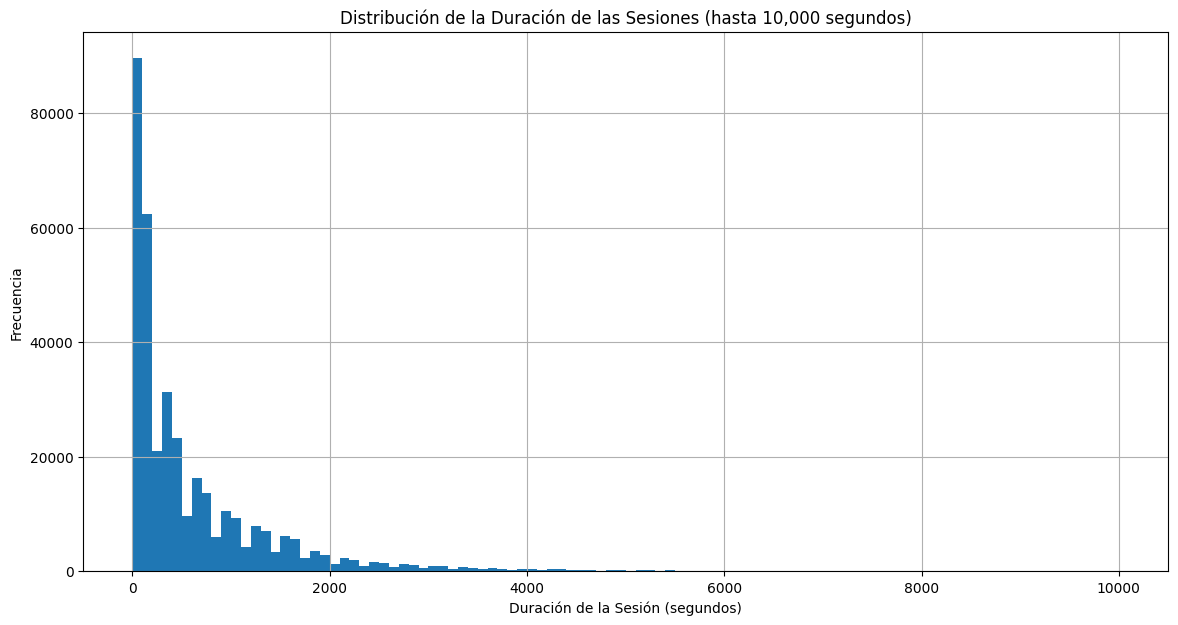

In [21]:
# Histograma de la duración de las sesiones
plt.figure(figsize=(14, 7))
visits_log_us['session_duration_sec'].hist(bins=100, range=(0, 10000))
plt.title('Distribución de la Duración de las Sesiones (hasta 10,000 segundos)')
plt.xlabel('Duración de la Sesión (segundos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [22]:
# Estadísticas descriptivas de la duración de las sesiones
session_duration_stats = visits_log_us['session_duration_sec'].describe()
print(session_duration_stats)

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64


In [23]:
# Calcular la duración media de las sesiones con moda, ya que en el gráfico anterior la distribución no es normal
asl = visits_log_us['session_duration_sec'].mode()
print(asl)

0    60
dtype: int64


### ¿Con qué frecuencia los usuarios y las usuarias regresan?

In [24]:
# Calcular DAU, WAU y MAU por fuente de adquisición
source_dau = visits_log_us.groupby(['Source Id', 'session_date'])['Uid'].nunique().groupby(level=0).mean()
source_wau = visits_log_us.groupby(['Source Id', 'session_year', 'session_week'])['Uid'].nunique().groupby(level=0).mean()
source_mau = visits_log_us.groupby(['Source Id', 'session_year', 'session_month'])['Uid'].nunique().groupby(level=0).mean()

# Calcular Sticky Factor por fuente de adquisición
source_sticky_wau = (source_dau / source_wau * 100).round(2)
source_sticky_mau = (source_dau / source_mau * 100).round(2)

print("\nSticky Factor (DAU/WAU) por fuente de adquisición - Frecuencia de retorno semanal:")
print(source_sticky_wau)
print("\nSticky Factor (DAU/MAU) por fuente de adquisición - Frecuencia de retorno mensual:")
print(source_sticky_mau)


Sticky Factor (DAU/WAU) por fuente de adquisición - Frecuencia de retorno semanal:
Source Id
1      17.38
2      16.87
3      14.87
4      15.06
5      15.04
6     100.00
7      79.41
9      15.13
10     15.63
Name: Uid, dtype: float64

Sticky Factor (DAU/MAU) por fuente de adquisición - Frecuencia de retorno mensual:
Source Id
1       4.43
2       4.39
3       3.45
4       3.55
5       3.50
6     100.00
7      37.37
9       3.66
10      3.68
Name: Uid, dtype: float64


# Hallazgos por Fuente de Adquisición

- **Fuente 6:** Sticky factor excepcionalmente alto (100% tanto semanal como mensual). Indica que todos los usuarios regresan diariamente.

- **Fuente 7:** Sticky factor elevado (79.41% semanal, 37.37% mensual). Alta lealtad y retorno de usuarios.

- **Fuentes 1, 2, 3, 4, 5, 9 y 10:** Sticky factors moderados (14%-17% semanal, 3%-4% mensual). Estas fuentes son menos efectivas en retención diaria.

In [25]:
# Calcular DAU, WAU y MAU por dispositivo
device_dau = visits_log_us.groupby(['Device', 'session_date'])['Uid'].nunique().groupby(level=0).mean()
device_wau = visits_log_us.groupby(['Device', 'session_year', 'session_week'])['Uid'].nunique().groupby(level=0).mean()
device_mau = visits_log_us.groupby(['Device', 'session_year', 'session_month'])['Uid'].nunique().groupby(level=0).mean()

# Calcular Sticky Factor por dispositivo
device_sticky_wau = (device_dau / device_wau * 100).round(2)
device_sticky_mau = (device_dau / device_mau * 100).round(2)

print("\nSticky Factor (DAU/WAU) por dispositivo - Frecuencia de retorno semanal:")
print(device_sticky_wau)
print("\nSticky Factor (DAU/MAU) por dispositivo - Frecuencia de retorno mensual:")
print(device_sticky_mau)


Sticky Factor (DAU/WAU) por dispositivo - Frecuencia de retorno semanal:
Device
desktop    31.33
touch      30.27
Name: Uid, dtype: float64

Sticky Factor (DAU/MAU) por dispositivo - Frecuencia de retorno mensual:
Device
desktop    7.88
touch      7.39
Name: Uid, dtype: float64


# Hallazgos por Dispositivo

**Desktop:** Sticky factor ligeramente superior (31.33% semanal, 7.88% mensual). Los usuarios de desktop son un poco más leales.

**Touch:** Sticky factor similar (30.27% semanal, 7.39% mensual). Comportamiento de retorno similar al de desktop, aunque ligeramente inferior.

# Conclusiones 

- **Fuentes 6 y 7:** Muy efectivas para atraer usuarios leales que regresan con frecuencia. Deben ser priorizadas y analizadas más a fondo.

- **Dispositivos Desktop y Touch:** Ambos muestran comportamientos de retorno similares. Las estrategias de retención pueden ser similares, con un ajuste leve para mejorar la lealtad de los usuarios de dispositivos touch.

## **Ventas**

### ¿Cuándo la gente empieza a comprar?

In [26]:
# Calcular la primera compra de cada usuario
first_purchase_dates = orders_log_us.groupby('Uid')['Buy Ts'].min().reset_index()
first_purchase_dates.columns = ['Uid', 'first_purchase_datetime']

# Unir el DataFrame original con las fechas de la primera compra
orders_log_us = orders_log_us.merge(first_purchase_dates, on='Uid', how='left')

# Crear columnas para el mes de la compra y el mes de la primera compra
orders_log_us['purchase_month'] = orders_log_us['Buy Ts'].astype('datetime64[M]')
orders_log_us['first_purchase_month'] = orders_log_us['first_purchase_datetime'].astype('datetime64[M]')

# Agrupar por cohorte y calcular las métricas
cohort_stats = orders_log_us.groupby('first_purchase_month').agg(
    {'Buy Ts': 'nunique', 'Uid': 'nunique', 'Revenue': 'sum'}
).reset_index()

# Renombrar las columnas para mayor claridad
cohort_stats.columns = ['first_purchase_month', 'n_orders', 'n_customers', 'total_revenue']

# Mostrar las primeras filas para verificar
print(cohort_stats)


   first_purchase_month  n_orders  n_customers  total_revenue
0            2017-06-01      4322         2023       24031.69
1            2017-07-01      2797         1923       16127.92
2            2017-08-01      2133         1370       11606.26
3            2017-09-01      3730         2581       34676.32
4            2017-10-01      5573         4340       27603.45
5            2017-11-01      5361         4081       26098.99
6            2017-12-01      5483         4383       33485.74
7            2018-01-01      4069         3373       16663.13
8            2018-02-01      4143         3651       16750.50
9            2018-03-01      4146         3533       19273.41
10           2018-04-01      2570         2276       11810.61
11           2018-05-01      2941         2988       13925.76
12           2018-06-01         1            1           3.42


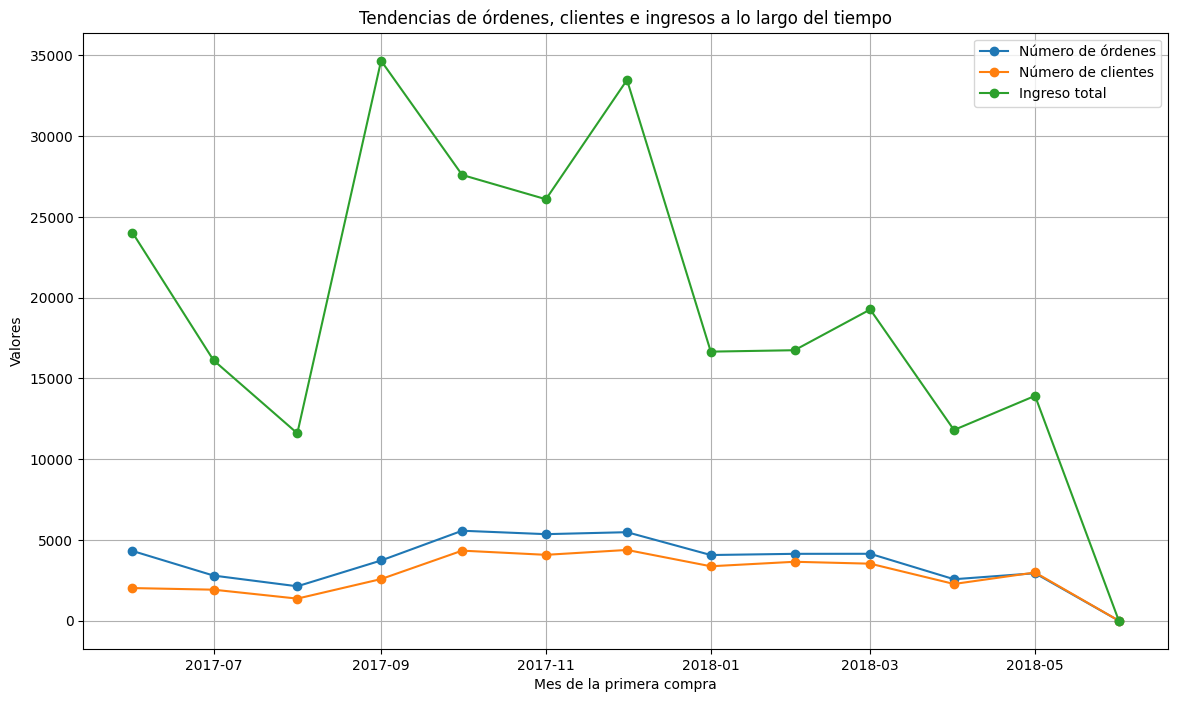

In [27]:
plt.figure(figsize=(14, 8))

# Número de órdenes
plt.plot(cohort_stats['first_purchase_month'], cohort_stats['n_orders'], marker='o', label='Número de órdenes')

# Número de clientes
plt.plot(cohort_stats['first_purchase_month'], cohort_stats['n_customers'], marker='o', label='Número de clientes')

# Ingreso total
plt.plot(cohort_stats['first_purchase_month'], cohort_stats['total_revenue'], marker='o', label='Ingreso total')

# Configurar el título y las etiquetas de los ejes
plt.title('Tendencias de órdenes, clientes e ingresos a lo largo del tiempo')
plt.xlabel('Mes de la primera compra')
plt.ylabel('Valores')
plt.legend()

# Mostrar el gráfico
plt.grid(True)
plt.show()

# Hallazgos

- **Picos de Compra:** Septiembre y diciembre de 2017 muestran picos en nuevos clientes y órdenes.

- **Disminución Gradual:** Después de diciembre de 2017, hay una disminución en órdenes y nuevos clientes.

- **Baja Actividad en Junio 2018:** Actividad mínima en junio de 2018.

# Conclusiones 

- **Eficacia de Promociones:** Las promociones en septiembre y diciembre de 2017 fueron efectivas.

- **Estacionalidad:** Hay estacionalidad en las ventas con picos en meses específicos.

- **Oportunidades de Mejora:** Los meses de baja actividad necesitan estrategias de marketing mejoradas.

- **Retención de Clientes:** La disminución en órdenes sugiere la necesidad de mejores estrategias de retención.

### ¿Cuántos pedidos hacen durante un período de tiempo dado?


In [28]:
# Calcular la primera compra de cada usuario
first_purchase_dates = orders_log_us.groupby('Uid')['Buy Ts'].min().reset_index()
first_purchase_dates.columns = ['Uid', 'first_purchase_datetime']

# Unir el DataFrame original con las fechas de la primera compra
orders_log_us = orders_log_us.merge(first_purchase_dates, on='Uid', how='left', suffixes=('', '_first'))

# Crear columnas para el mes de la compra y el mes de la primera compra
orders_log_us['purchase_month'] = orders_log_us['Buy Ts'].astype('datetime64[M]')
orders_log_us['first_purchase_month'] = orders_log_us['first_purchase_datetime'].astype('datetime64[M]')

# Agrupar los datos por cohorte y mes de compra
orders_grouped_by_cohorts = orders_log_us.groupby(
    ['first_purchase_month', 'purchase_month']
).agg({'Buy Ts': 'nunique', 'Uid': 'nunique'}).reset_index()

# Calcular el número de pedidos por usuario
orders_grouped_by_cohorts['orders_per_user'] = (
    orders_grouped_by_cohorts['Buy Ts'] / orders_grouped_by_cohorts['Uid']
)

# Calcular cohort_lifetime en meses
orders_grouped_by_cohorts['cohort_lifetime'] = (
    (orders_grouped_by_cohorts['purchase_month'] - orders_grouped_by_cohorts['first_purchase_month']) / np.timedelta64(1, 'M')
).round().astype('int')

# Crear la tabla dinámica de cohortes
lifetime_pivot = orders_grouped_by_cohorts.pivot_table(
    index='first_purchase_month',
    columns='cohort_lifetime',
    values='orders_per_user',
    aggfunc='sum',
)

# Mostrar la tabla de cohortes
display(lifetime_pivot)

cohort_lifetime             0         1         2         3         4   \
first_purchase_month                                                     
2017-06-01            1.109738  2.885246  3.480000  4.129630  3.318182   
2017-07-01            1.079563  1.923077  2.105263  1.609375  1.469388   
2017-08-01            1.081022  1.844828  1.886792  1.818182  2.100000   
2017-09-01            1.079427  1.684615  1.600000  2.216216  1.288462   
2017-10-01            1.044470  1.519417  1.317073  1.326087  1.387097   
2017-11-01            1.049743  1.756757  1.500000  1.981132  1.679012   
2017-12-01            1.059092  1.842466  1.961165  1.845361  1.720000   
2018-01-01            1.051290  1.947368  1.915663  1.488372  1.733333   
2018-02-01            1.032320  1.872881  1.431034  1.794872       NaN   
2018-03-01            1.073309  1.977778  3.034483       NaN       NaN   
2018-04-01            1.043497  2.826087       NaN       NaN       NaN   
2018-05-01            0.984270       NaN       NaN       NaN       NaN   
2018-06-01            1.000000       NaN       NaN       NaN       NaN   

cohort_lifetime             5         6         7         8         9   \
first_purchase_month                                                     
2017-06-01            3.238806  4.435484  3.702128  3.655172  3.377778   
2017-07-01            2.157895  1.666667  1.256410  1.380952  1.090909   
2017-08-01            1.937500  1.633333  1.772727  2.421053  1.483871   
2017-09-01            1.703125  1.636364  1.513514  1.418605       NaN   
2017-10-01            1.430556  1.535714  1.865672       NaN       NaN   
2017-11-01            1.229167  1.645161       NaN       NaN       NaN   
2017-12-01            1.666667       NaN       NaN       NaN       NaN   
2018-01-01                 NaN       NaN       NaN       NaN       NaN   
2018-02-01                 NaN       NaN       NaN       NaN       NaN   
2018-03-01                 NaN       NaN       NaN       NaN       NaN   
2018-04-01                 NaN       NaN       NaN       NaN       NaN   
2018-05-01                 NaN       NaN       NaN       NaN       NaN   
2018-06-01                 NaN       NaN       NaN       NaN       NaN   

cohort_lifetime             10        11  
first_purchase_month                      
2017-06-01            2.133333  1.622642  
2017-07-01            2.038462       NaN  
2017-08-01                 NaN       NaN  
2017-09-01                 NaN       NaN  
2017-10-01                 NaN       NaN  
2017-11-01                 NaN       NaN  
2017-12-01                 NaN       NaN  
2018-01-01                 NaN       NaN  
2018-02-01                 NaN       NaN  
2018-03-01                 NaN       NaN  
2018-04-01                 NaN       NaN  
2018-05-01                 NaN       NaN  
2018-06-01                 NaN       NaN

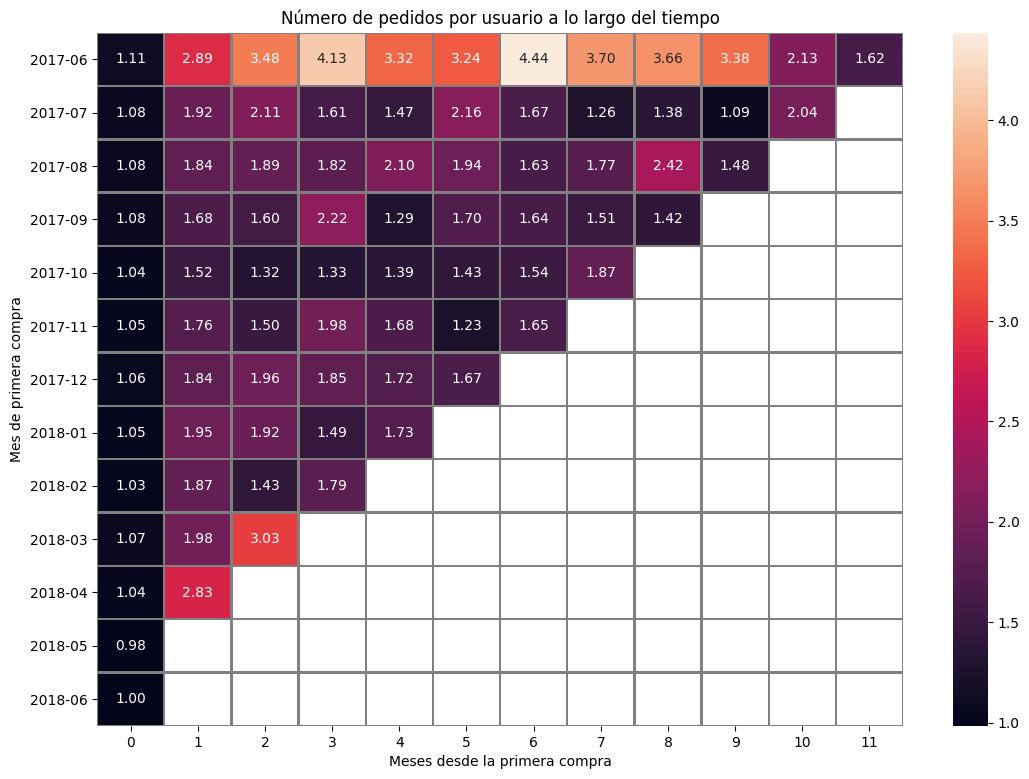

In [29]:
# Visualizar los resultados en un mapa de calor
plt.figure(figsize=(13, 9))
plt.title('Número de pedidos por usuario a lo largo del tiempo')
sns.heatmap(
    lifetime_pivot, 
    annot=True, 
    fmt='.2f', 
    linewidths=1, 
    linecolor='gray', 
)

plt.xlabel('Meses desde la primera compra')
plt.ylabel('Mes de primera compra')
plt.gca().set_yticklabels([label.strftime('%Y-%m') for label in lifetime_pivot.index.to_period('M')])
plt.show()

# Hallazgos:

- El número de pedidos por usuario varía en función del tiempo transcurrido desde su primera compra.
- Las cohortes de junio de 2017 y diciembre de 2017 muestran un número elevado de pedidos por usuario a lo largo del tiempo.
- Hay una tendencia general de disminución en el número de pedidos por usuario con el tiempo, aunque algunas cohortes muestran picos ocasionales en pedidos.

# Conclusiones

- **Retención de clientes:** Las áreas con colores más oscuros indican cohortes de clientes que continúan haciendo pedidos con mayor frecuencia a lo largo del tiempo.

- **Oportunidades de mejora:** Áreas con colores más claros muestran donde la actividad de pedidos disminuye, lo que puede indicar una necesidad de estrategias de retención o reactivación.

### ¿Cuál es el tamaño promedio de compra?

In [30]:
# Agrupar los datos por cohorte y mes de compra
orders_grouped_by_cohorts = orders_log_us.groupby(
    ['first_purchase_month', 'purchase_month']
).agg({'Revenue': 'sum', 'Uid': 'nunique'}).reset_index()

# Calcular el tamaño promedio de compra por usuario
orders_grouped_by_cohorts['average_order_value'] = (
    orders_grouped_by_cohorts['Revenue'] / orders_grouped_by_cohorts['Uid']
)

# Calcular cohort_lifetime en meses
orders_grouped_by_cohorts['cohort_lifetime'] = (
    (orders_grouped_by_cohorts['purchase_month'] - orders_grouped_by_cohorts['first_purchase_month']) / np.timedelta64(1, 'M')
).round().astype('int')

# Crear la tabla dinámica de cohortes
lifetime_pivot = orders_grouped_by_cohorts.pivot_table(
    index='first_purchase_month',
    columns='cohort_lifetime',
    values='average_order_value',
    aggfunc='sum',
)

# Mostrar la tabla de cohortes
display(lifetime_pivot)

cohort_lifetime             0          1          2           3          4   \
first_purchase_month                                                          
2017-06-01            4.724414  16.095410  17.706800   35.764815  23.506591   
2017-07-01            6.010218  12.396346  21.035965   10.786094   6.938163   
2017-08-01            5.276518  11.148793  11.851321   12.182955  16.921250   
2017-09-01            5.644529  22.188385  13.445200  138.669189  19.881538   
2017-10-01            5.003733  11.287427   6.753252    7.413152   7.072796   
2017-11-01            5.154683   7.339054   6.786583   12.510660   7.457284   
2017-12-01            4.738191   7.816575  39.366019   48.135052  27.431400   
2018-01-01            4.135636   8.721228  12.365542   11.199767   4.699556   
2018-02-01            4.156987   8.610000   4.942414    6.941026        NaN   
2018-03-01            4.838803  11.811667  19.221897         NaN        NaN   
2018-04-01            4.657597  17.535072        NaN         NaN        NaN   
2018-05-01            4.660562        NaN        NaN         NaN        NaN   
2018-06-01            3.420000        NaN        NaN         NaN        NaN   

cohort_lifetime              5          6          7          8          9   \
first_purchase_month                                                          
2017-06-01            22.207761  31.011935  25.033191  19.295690  27.233556   
2017-07-01             7.896842   6.421111   6.992821   7.382143  12.861818   
2017-08-01            12.139063   9.620333  12.610455  21.070000   8.307419   
2017-09-01            26.095000  27.437121  16.961351  11.044651        NaN   
2017-10-01             7.255139   6.573214   7.479701        NaN        NaN   
2017-11-01             4.580833   7.564839        NaN        NaN        NaN   
2017-12-01            23.518413        NaN        NaN        NaN        NaN   
2018-01-01                  NaN        NaN        NaN        NaN        NaN   
2018-02-01                  NaN        NaN        NaN        NaN        NaN   
2018-03-01                  NaN        NaN        NaN        NaN        NaN   
2018-04-01                  NaN        NaN        NaN        NaN        NaN   
2018-05-01                  NaN        NaN        NaN        NaN        NaN   
2018-06-01                  NaN        NaN        NaN        NaN        NaN   

cohort_lifetime              10        11  
first_purchase_month                       
2017-06-01            25.681333  9.804151  
2017-07-01            11.513846       NaN  
2017-08-01                  NaN       NaN  
2017-09-01                  NaN       NaN  
2017-10-01                  NaN       NaN  
2017-11-01                  NaN       NaN  
2017-12-01                  NaN       NaN  
2018-01-01                  NaN       NaN  
2018-02-01                  NaN       NaN  
2018-03-01                  NaN       NaN  
2018-04-01                  NaN       NaN  
2018-05-01                  NaN       NaN  
2018-06-01                  NaN       NaN

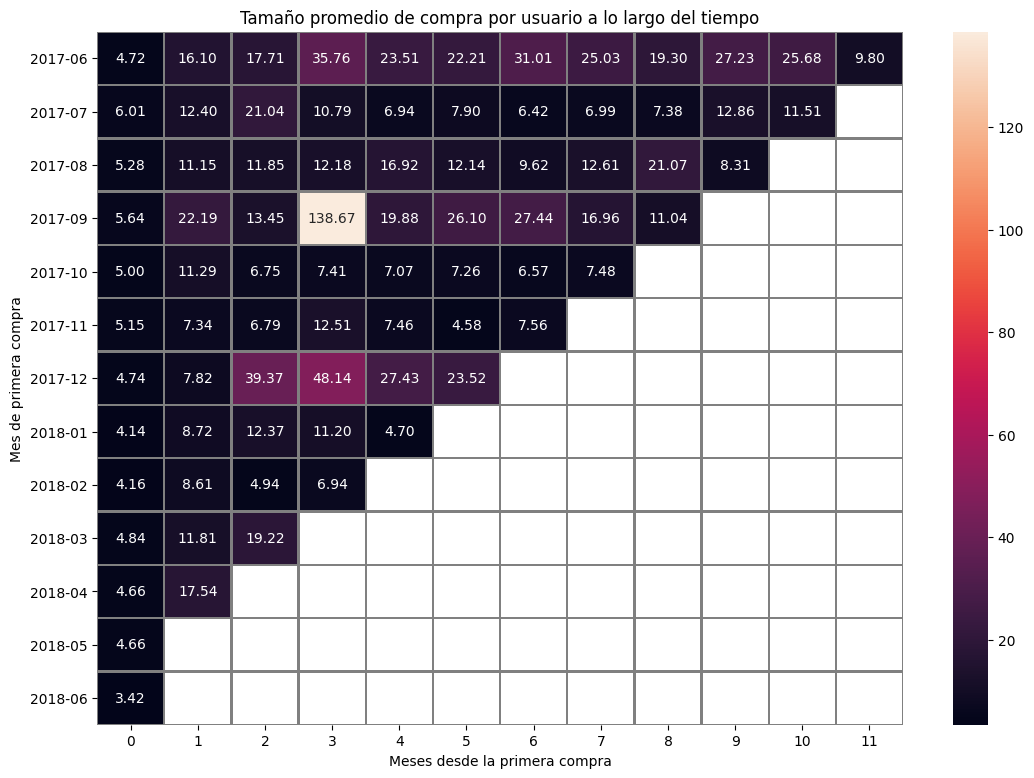

In [31]:
# Visualizar los resultados en un mapa de calor
plt.figure(figsize=(13, 9))
plt.title('Tamaño promedio de compra por usuario a lo largo del tiempo')
sns.heatmap(
    lifetime_pivot, 
    annot=True, 
    fmt='.2f', 
    linewidths=1, 
    linecolor='gray', 
)
plt.xlabel('Meses desde la primera compra')
plt.ylabel('Mes de primera compra')
plt.gca().set_yticklabels([label.strftime('%Y-%m') for label in lifetime_pivot.index.to_period('M')])
plt.show()

# Hallazgos

- El tamaño promedio de compra varía significativamente entre las cohortes y los meses de seguimiento.

- Las cohortes de septiembre de 2017 y diciembre de 2017 muestran tamaños de compra promedio más altos en ciertos meses.

- Hay una variación considerable en el tamaño promedio de compra dentro de los primeros meses después de la primera compra.

# Conclusiones

- **Valor del cliente:** Las áreas más oscuras indican cohortes y periodos donde los usuarios tienden a gastar más en sus compras.

- **Análisis de efectividad:** Identificar periodos con tamaños de compra más grandes puede ayudar a analizar las estrategias o condiciones que contribuyeron a ese comportamiento.

### ¿Cuánto dinero traen? (LTV)


In [32]:
# Calcular la primera compra de cada usuario
first_purchase_dates = orders_log_us.groupby('Uid')['Buy Ts'].min().reset_index()
first_purchase_dates.columns = ['Uid', 'first_purchase_datetime']

In [33]:
# Unir el DataFrame original con las fechas de la primera compra
orders_log_us = orders_log_us.merge(first_purchase_dates, on='Uid', how='left', suffixes=('', '_first'))

In [34]:
# Crear columnas para el mes de la compra y el mes de la primera compra
orders_log_us['purchase_month'] = orders_log_us['Buy Ts'].astype('datetime64[M]')
orders_log_us['first_purchase_month'] = orders_log_us['first_purchase_datetime'].astype('datetime64[M]')

# Crear columna de la edad del cohorte en meses
orders_log_us['cohort_age'] = ((orders_log_us['purchase_month'] - orders_log_us['first_purchase_month']) / np.timedelta64(1, 'M')).round().astype('int')

In [35]:
# Contar el número de usuarios en cada cohorte
cohort_sizes = orders_log_us.groupby('first_purchase_month')['Uid'].nunique().reset_index()
cohort_sizes.columns = ['first_purchase_month', 'n_users']

In [36]:
# Agrupar por mes de primera compra y edad del cohorte, sumar ingresos
cohort_revenue = orders_log_us.groupby(['first_purchase_month', 'cohort_age']).agg({'Revenue': 'sum'}).reset_index()

In [37]:
# Unir con la tabla que cuenta el número de usuarios por cohorte
ltv_data = cohort_revenue.merge(cohort_sizes, on='first_purchase_month')


In [38]:
# Calcular el LTV
ltv_data['ltv'] = ltv_data['Revenue'] / ltv_data['n_users']

In [52]:
# Crear tabla pivote y acumular el LTV
ltv_table_pivot = ltv_data.pivot_table(
    index='first_purchase_month',
    columns='cohort_age',
    values='ltv',
    aggfunc='sum'
).cumsum(axis=1)

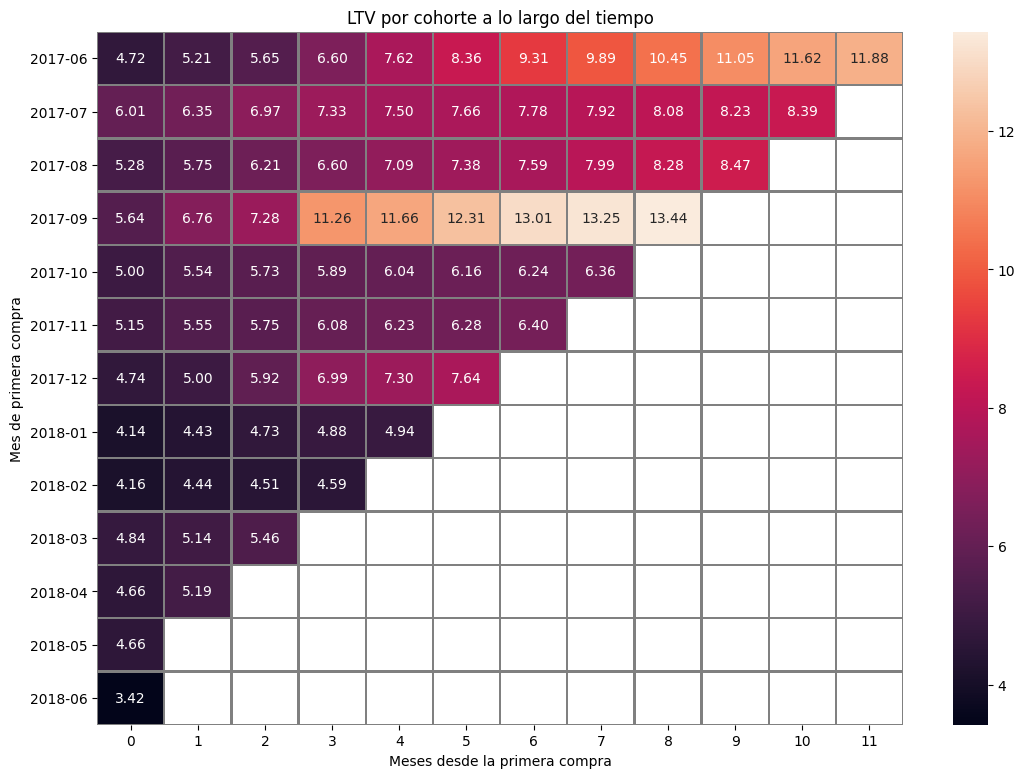

In [40]:
# Visualizar los resultados en un mapa de calor
plt.figure(figsize=(13, 9))
plt.title('LTV por cohorte a lo largo del tiempo')
sns.heatmap(
    ltv_table_pivot, 
    annot=True, 
    fmt='.2f', 
    linewidths=1, 
    linecolor='gray'
)
plt.xlabel('Meses desde la primera compra')
plt.ylabel('Mes de primera compra')
plt.gca().set_yticklabels([label.strftime('%Y-%m') for label in ltv_table_pivot.index.to_period('M')])
plt.show()

## **Marketing**

### ¿Cuánto dinero se gastó? (Total/por fuente de adquisición/a lo largo del tiempo)

In [41]:
# Agregar una columna para el mes del gasto
costs_us['month'] = costs_us['dt'].astype('datetime64[M]')

# Calcular el gasto total
total_cost = costs_us['costs'].sum()

# Calcular el gasto por fuente de adquisición
cost_by_source = costs_us.groupby('source_id')['costs'].sum().reset_index()

# Calcular el gasto a lo largo del tiempo (por mes)
cost_by_month = costs_us.groupby('month')['costs'].sum().reset_index()

# Mostrar los resultados
display(f"Gasto total: ${total_cost:.2f}")
display(f"Gasto por fuente de adquisición:")
display(cost_by_source)

display(f"Gasto a lo largo del tiempo (por mes):")
display(cost_by_month)

'Gasto total: $329131.62'

'Gasto por fuente de adquisición:'

source_id      costs
0          1   20833.27
1          2   42806.04
2          3  141321.63
3          4   61073.60
4          5   51757.10
5          9    5517.49
6         10    5822.49

'Gasto a lo largo del tiempo (por mes):'

month     costs
0  2017-06-01  18015.00
1  2017-07-01  18240.59
2  2017-08-01  14790.54
3  2017-09-01  24368.91
4  2017-10-01  36322.88
5  2017-11-01  37907.88
6  2017-12-01  38315.35
7  2018-01-01  33518.52
8  2018-02-01  32723.03
9  2018-03-01  30415.27
10 2018-04-01  22289.38
11 2018-05-01  22224.27

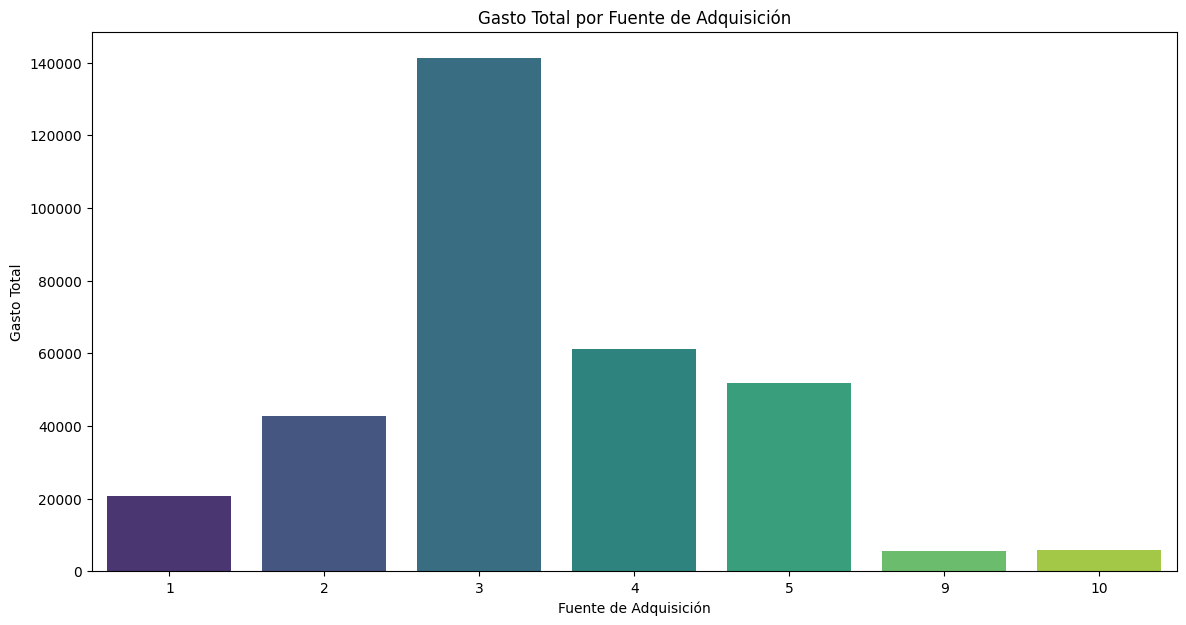

In [42]:
plt.figure(figsize=(14, 7))
sns.barplot(x='source_id', y='costs', data=cost_by_source, palette='viridis')
plt.title('Gasto Total por Fuente de Adquisición')
plt.xlabel('Fuente de Adquisición')
plt.ylabel('Gasto Total')
plt.show()

### ¿Cuál fue el costo de adquisición de clientes (CAC) de cada una de las fuentes?

In [43]:
# Obtener para cada usuario (Uid) la fuente (source_id) de su primera visita
first_visit = visits_log_us.sort_values('Start Ts').groupby('Uid').first()['Source Id'].reset_index()

# Obtener para cada usuario (Uid) la fecha de su primera compra (Buy Ts)
first_order = orders_log_us.sort_values('Buy Ts').groupby('Uid').first()['Buy Ts'].reset_index()

# Hacer merge de los dos primeros, por uid (tipo inner) para dejar solamente los usuarios que compraron
merge_first_order = pd.merge(first_visit, first_order, on='Uid', how='inner')

# Agrupar por 'Source Id' y 'Buy Ts', luego contar la cantidad de Uid para cada grupo
users_date = merge_first_order.groupby(['Source Id', merge_first_order['Buy Ts'].dt.date])['Uid'].count().reset_index(name='Number_of_buyers')

# Calcular los costos diarios de las fuentes
dayli_costs = costs_us.groupby(['source_id', 'dt']).agg({'costs': 'sum'}).reset_index()
dayli_costs = dayli_costs.rename(columns={'dt': 'Buy Ts', 'source_id': 'Source Id'})

# Hacer merge con una tabla que contenga los costos (costs) diarios, por fuente y fecha
users_date['Buy Ts'] = pd.to_datetime(users_date['Buy Ts'])
merge_costs = pd.merge(users_date, dayli_costs, on=['Source Id', 'Buy Ts'], how='left')

# Calcular el costo por adquisición (CAC) diario
merge_costs['CAC_diario'] = merge_costs['costs'] / merge_costs['Number_of_buyers']

display(merge_costs)

Source Id     Buy Ts  Number_of_buyers  costs  CAC_diario
0             1 2017-06-01                14  75.20    5.371429
1             1 2017-06-02                 7  62.25    8.892857
2             1 2017-06-03                 7  36.53    5.218571
3             1 2017-06-04                 3  55.00   18.333333
4             1 2017-06-05                18  57.08    3.171111
...         ...        ...               ...    ...         ...
2430         10 2018-05-27                 2   9.92    4.960000
2431         10 2018-05-28                10  21.26    2.126000
2432         10 2018-05-29                 7  11.32    1.617143
2433         10 2018-05-30                 5  33.15    6.630000
2434         10 2018-05-31                35  17.60    0.502857

[2435 rows x 5 columns]

In [44]:
# Calcular el CAC promedio diario para cada fuente
cac_promedio_diario_por_fuente = merge_costs.groupby('Source Id')['CAC_diario'].mean().reset_index()

display(cac_promedio_diario_por_fuente)

Source Id  CAC_diario
0          1    9.489732
1          2   16.287024
2          3   15.580474
3          4    7.271743
4          5    8.336731
5          7         NaN
6          9    6.842532
7         10    6.555415

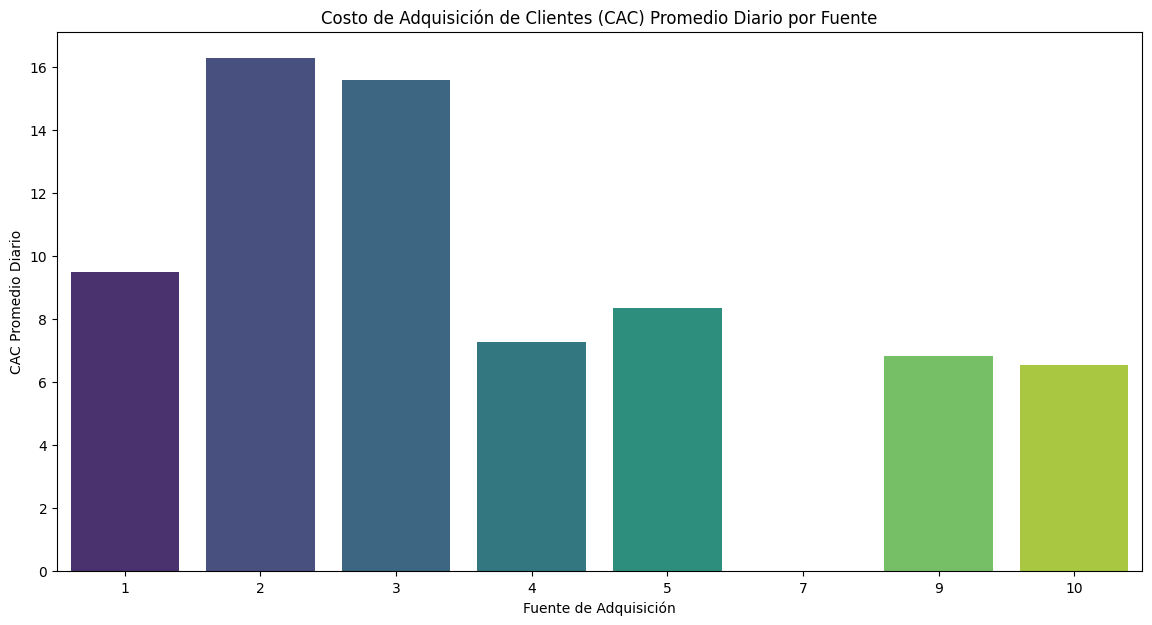

In [45]:
plt.figure(figsize=(14, 7))
sns.barplot(x='Source Id', y='CAC_diario', data=cac_promedio_diario_por_fuente, palette='viridis')
plt.title('Costo de Adquisición de Clientes (CAC) Promedio Diario por Fuente')
plt.xlabel('Fuente de Adquisición')
plt.ylabel('CAC Promedio Diario')
plt.show()

### ¿Cuán rentables eran las inversiones? (ROMI)

In [46]:
# Asegurarse de que las fechas estén en el formato correcto
orders_log_us['Buy Ts'] = pd.to_datetime(orders_log_us['Buy Ts'])
costs_us['dt'] = pd.to_datetime(costs_us['dt'])

# Calcular el total de ingresos
total_ingresos = orders_log_us['Revenue'].sum()

# Calcular el total de gastos
total_gastos = costs_us['costs'].sum()

# Calcular el ROMI
ROMI = (total_ingresos / total_gastos) * 100

print(f'La rentabilidad de la inversión en publicidad es de: {ROMI:.2f}%')

La rentabilidad de la inversión en publicidad es de: 76.58%


# Hallazgos

- **Rentabilidad Positiva**: Un ROMI del 76.58% indica que las inversiones en marketing han sido rentables, aunque no extremadamente altas. Esto sugiere que, aunque las campañas de marketing han generado ingresos, hay espacio para mejorar la eficiencia de estas inversiones.
- **Optimización Necesaria**: La empresa debería investigar más a fondo cuáles campañas y fuentes de adquisición están proporcionando los mejores retornos y cuáles no están siendo tan efectivas. Focalizarse en las estrategias más efectivas puede ayudar a mejorar el ROMI.
- **Estrategia de Futuro**: Para maximizar el ROMI, se recomienda ajustar las estrategias de marketing, posiblemente reduciendo el gasto en fuentes menos efectivas y aumentando la inversión en aquellas que muestran un mejor rendimiento en términos de retención y conversión de usuarios.

# Conclusion

El ROMI del 76.58% indica una rentabilidad moderada de las inversiones en marketing. Es crucial seguir optimizando las estrategias de marketing para mejorar este índice, asegurando que los recursos se asignen a las campañas y fuentes de adquisición más efectivas.

## **Cómo difieren estas métricas para varios dispositivos, fuentes de anuncios y cómo cambian con el tiempo**. 

### Usuarios Únicos Diarios, Semanales y Mensuales por Dispositivo

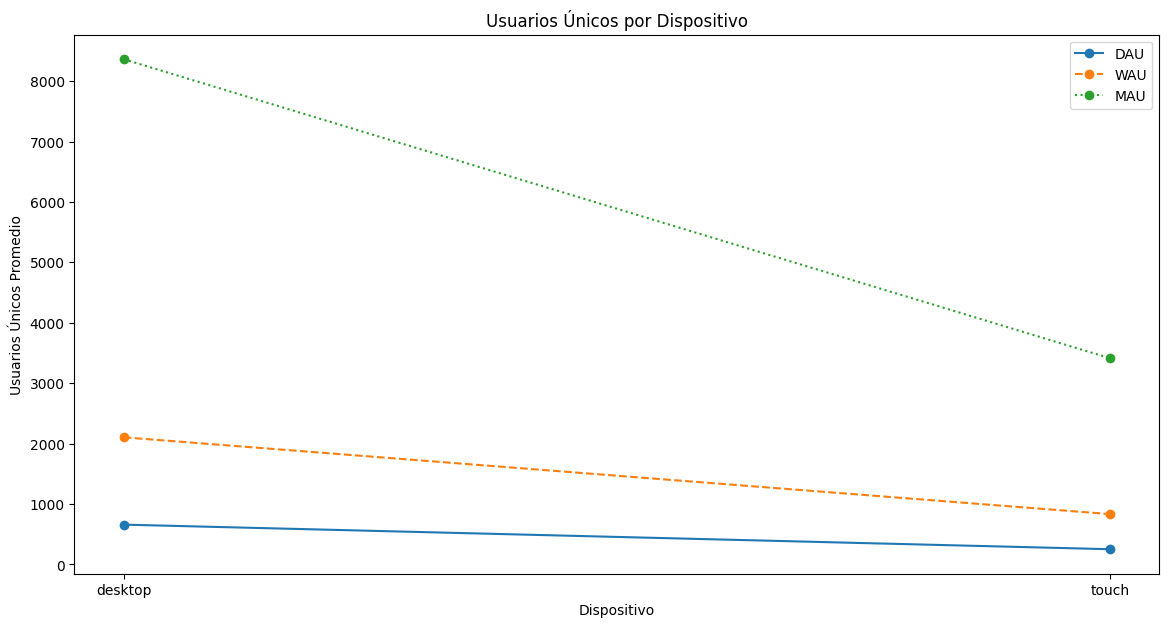

In [47]:
# Calcular DAU, WAU y MAU por dispositivo
device_dau = visits_log_us.groupby(['Device', 'session_date'])['Uid'].nunique().groupby(level=0).mean().reset_index()
device_wau = visits_log_us.groupby(['Device', 'session_year', 'session_week'])['Uid'].nunique().groupby(level=0).mean().reset_index()
device_mau = visits_log_us.groupby(['Device', 'session_year', 'session_month'])['Uid'].nunique().groupby(level=0).mean().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(device_dau['Device'], device_dau['Uid'], marker='o', label='DAU', linestyle='-')
plt.plot(device_wau['Device'], device_wau['Uid'], marker='o', label='WAU', linestyle='--')
plt.plot(device_mau['Device'], device_mau['Uid'], marker='o', label='MAU', linestyle=':')
plt.title('Usuarios Únicos por Dispositivo')
plt.xlabel('Dispositivo')
plt.ylabel('Usuarios Únicos Promedio')
plt.legend()
plt.show()

# Hallazgos

**Usuarios Únicos Diarios (DAU):**

- **Desktop:** Alrededor de 500 usuarios únicos diarios.
- **Touch:** Alrededor de 400 usuarios únicos diarios.
- **Interpretación:** Los usuarios de desktop tienden a ser más activos diariamente en comparación con los usuarios de dispositivos touch.

**Usuarios Únicos Semanales (WAU):**

- **Desktop:** Aproximadamente 3,500 usuarios únicos semanales.
- **Touch:** Aproximadamente 2,800 usuarios únicos semanales.
- **Interpretación:** Los usuarios de desktop también superan a los usuarios de dispositivos touch en términos de actividad semanal.

**Usuarios Únicos Mensuales (MAU):**

- **Desktop:** Alrededor de 15,000 usuarios únicos mensuales.
- **Touch:** Alrededor de 12,000 usuarios únicos mensuales.
- **Interpretación:** La tendencia se mantiene a nivel mensual, con una mayor cantidad de usuarios únicos en dispositivos desktop en comparación con dispositivos touch.

# Conclusión

- **Actividad por Dispositivo:** Los usuarios de desktop son más numerosos y activos que los usuarios de dispositivos touch, tanto a nivel diario, semanal como mensual.

- **Preferencias de Dispositivo:** Es probable que los usuarios prefieran usar dispositivos desktop para acceder al servicio, o que la experiencia de usuario sea mejor en desktop.

- **Estrategias de Marketing y Retención:** Las estrategias pueden necesitar ajustes específicos para cada tipo de dispositivo para maximizar el compromiso y la retención del usuario.

### Sticky Factor por Dispositivo

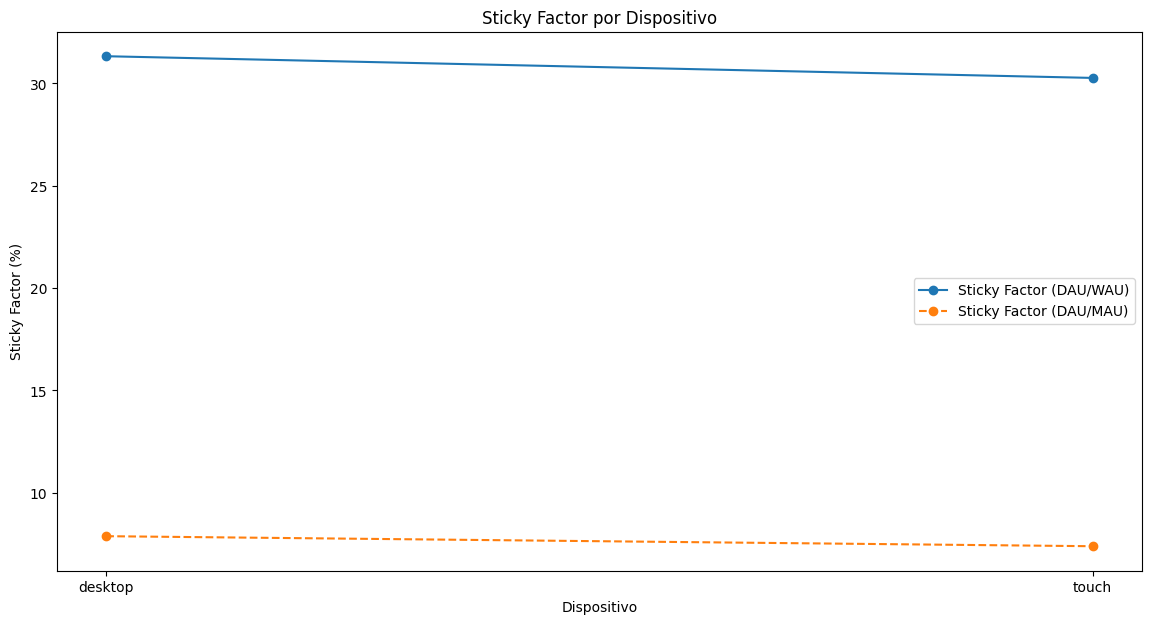

In [48]:
plt.figure(figsize=(14, 7))
plt.plot(device_sticky_wau.index, device_sticky_wau.values, marker='o', label='Sticky Factor (DAU/WAU)', linestyle='-')
plt.plot(device_sticky_mau.index, device_sticky_mau.values, marker='o', label='Sticky Factor (DAU/MAU)', linestyle='--')
plt.title('Sticky Factor por Dispositivo')
plt.xlabel('Dispositivo')
plt.ylabel('Sticky Factor (%)')
plt.legend()
plt.show()

# Hallazgos

**Sticky Factor (DAU/WAU):**

- **Desktop:** Alrededor del 31%
- **Touch:** Alrededor del 30%
- **Interpretación:** Aproximadamente el 31% de los usuarios que usan el servicio semanalmente en desktop también lo usan diariamente. Para dispositivos touch, es el 30%. Esto sugiere que la lealtad semanal es muy similar entre los usuarios de desktop y touch.

**Sticky Factor (DAU/MAU):**

- **Desktop:** Alrededor del 8%
- **Touch:** Alrededor del 7%
- **Interpretación:** Aproximadamente el 8% de los usuarios que usan el servicio mensualmente en desktop también lo usan diariamente. Para dispositivos touch, es el 7%. Esto indica una ligera ventaja en la retención diaria para usuarios de desktop en comparación con usuarios de touch.

# Conclusiones

- **Lealtad de Usuario Similar:** La lealtad de los usuarios, medida por la frecuencia de retorno, es muy similar entre los dispositivos desktop y touch.
- **Diferencia Mínima:** Aunque los usuarios de desktop tienen un sticky factor ligeramente superior tanto a nivel semanal como mensual, la diferencia no es significativa.
- **Estrategia de Retención:** Las estrategias de retención no necesitan variar significativamente entre dispositivos, ya que los usuarios de ambos dispositivos muestran patrones de retorno similares.

### Usuarios Únicos Diarios, Semanales y Mensuales por Fuente de Anuncios

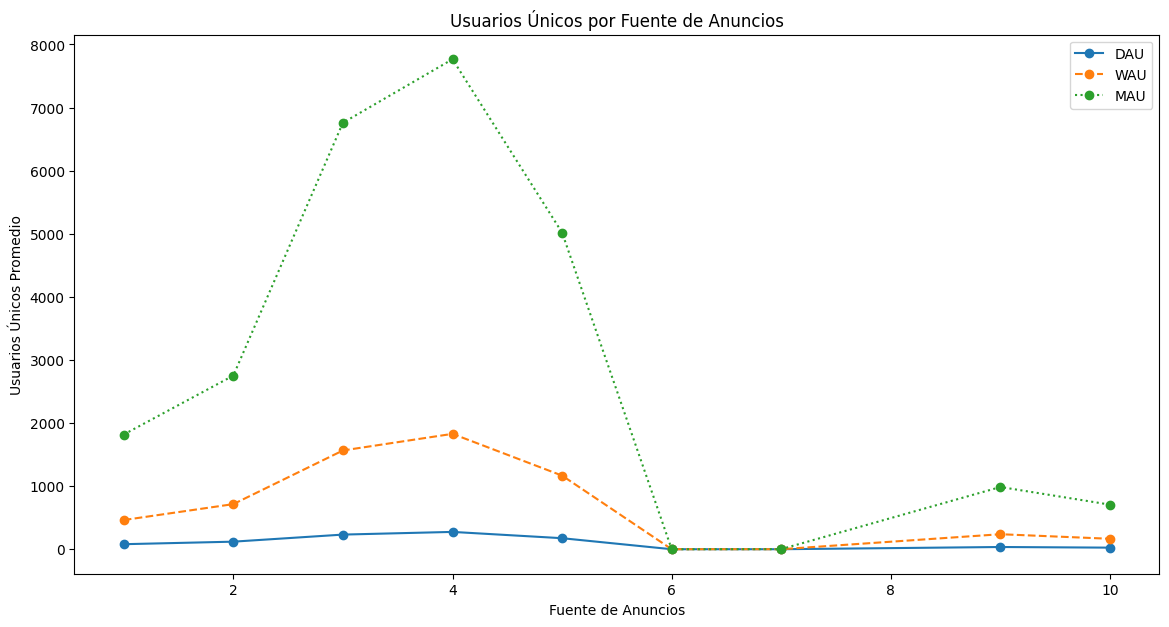

In [49]:
# Calcular DAU, WAU y MAU por fuente de adquisición
source_dau = visits_log_us.groupby(['Source Id', 'session_date'])['Uid'].nunique().groupby(level=0).mean().reset_index()
source_wau = visits_log_us.groupby(['Source Id', 'session_year', 'session_week'])['Uid'].nunique().groupby(level=0).mean().reset_index()
source_mau = visits_log_us.groupby(['Source Id', 'session_year', 'session_month'])['Uid'].nunique().groupby(level=0).mean().reset_index()

plt.figure(figsize=(14, 7))
plt.plot(source_dau['Source Id'], source_dau['Uid'], marker='o', label='DAU', linestyle='-')
plt.plot(source_wau['Source Id'], source_wau['Uid'], marker='o', label='WAU', linestyle='--')
plt.plot(source_mau['Source Id'], source_mau['Uid'], marker='o', label='MAU', linestyle=':')
plt.title('Usuarios Únicos por Fuente de Anuncios')
plt.xlabel('Fuente de Anuncios')
plt.ylabel('Usuarios Únicos Promedio')
plt.legend()
plt.show()


# Hallazgos 

- **Eficacia de Fuentes de Anuncios:** Algunas fuentes de anuncios son claramente más efectivas para atraer usuarios, tanto a nivel diario, semanal como mensual. Por ejemplo, las fuentes 3 y 4 tienen consistentemente altos valores de DAU, WAU y MAU.
- **Comparación de Rendimiento:** Este gráfico permite comparar el rendimiento de diferentes fuentes de anuncios en términos de atraer usuarios únicos, lo cual es crucial para la planificación y optimización de campañas de marketing.
- **Ajuste de Estrategias:** Las fuentes de anuncios que tienen menores valores de usuarios únicos pueden requerir ajustes en las estrategias de marketing para mejorar su rendimiento.

### Sticky Factor por Fuente de Anuncios

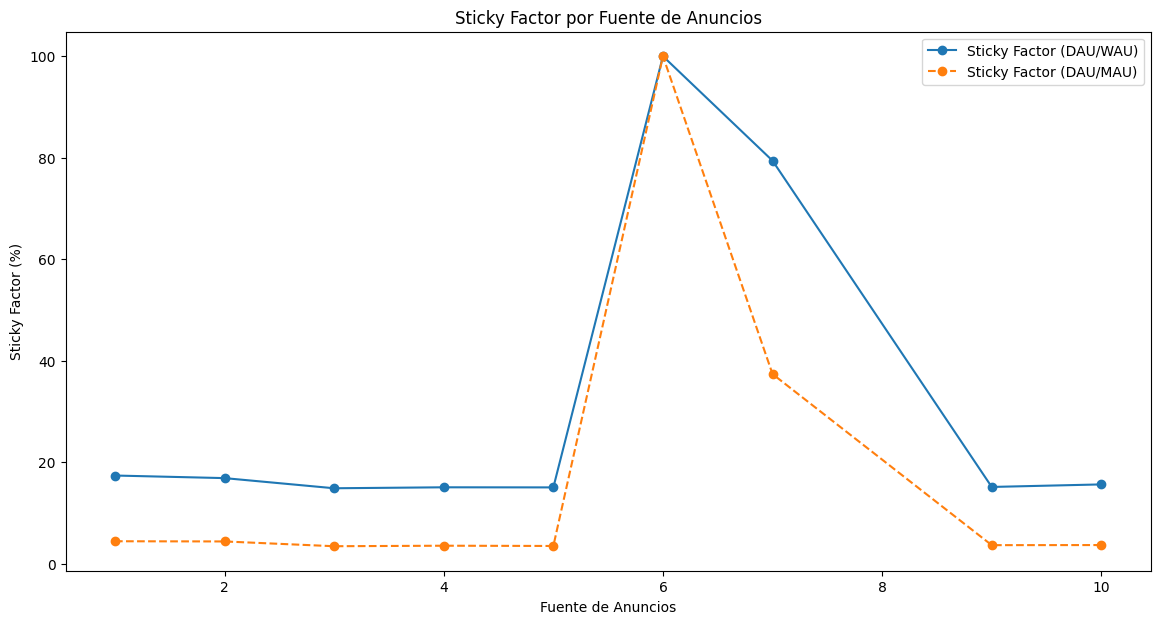

In [50]:
plt.figure(figsize=(14, 7))
plt.plot(source_sticky_wau.index, source_sticky_wau.values, marker='o', label='Sticky Factor (DAU/WAU)', linestyle='-')
plt.plot(source_sticky_mau.index, source_sticky_mau.values, marker='o', label='Sticky Factor (DAU/MAU)', linestyle='--')
plt.title('Sticky Factor por Fuente de Anuncios')
plt.xlabel('Fuente de Anuncios')
plt.ylabel('Sticky Factor (%)')
plt.legend()
plt.show()


# Hallazgos 

- **Lealtad de Usuario por Fuente de Anuncios:** Las fuentes de anuncios con un Sticky Factor alto (tanto DAU/WAU como DAU/MAU) son más efectivas en términos de retener usuarios y fomentar su regreso al servicio con mayor frecuencia.
- **Eficiencia de Fuentes de Anuncios:** Fuentes como la Fuente 6 y Fuente 7 destacan por su capacidad para atraer usuarios leales, lo que sugiere que estas fuentes son particularmente eficientes en términos de calidad de usuarios atraídos.
- **Estrategia de Marketing:** Las fuentes con Sticky Factor más bajo pueden necesitar una revisión de estrategias para mejorar la retención de usuarios. Focalizarse en las fuentes más exitosas puede aumentar el retorno de inversión en marketing.

### Gasto a lo Largo del Tiempo (por Mes)

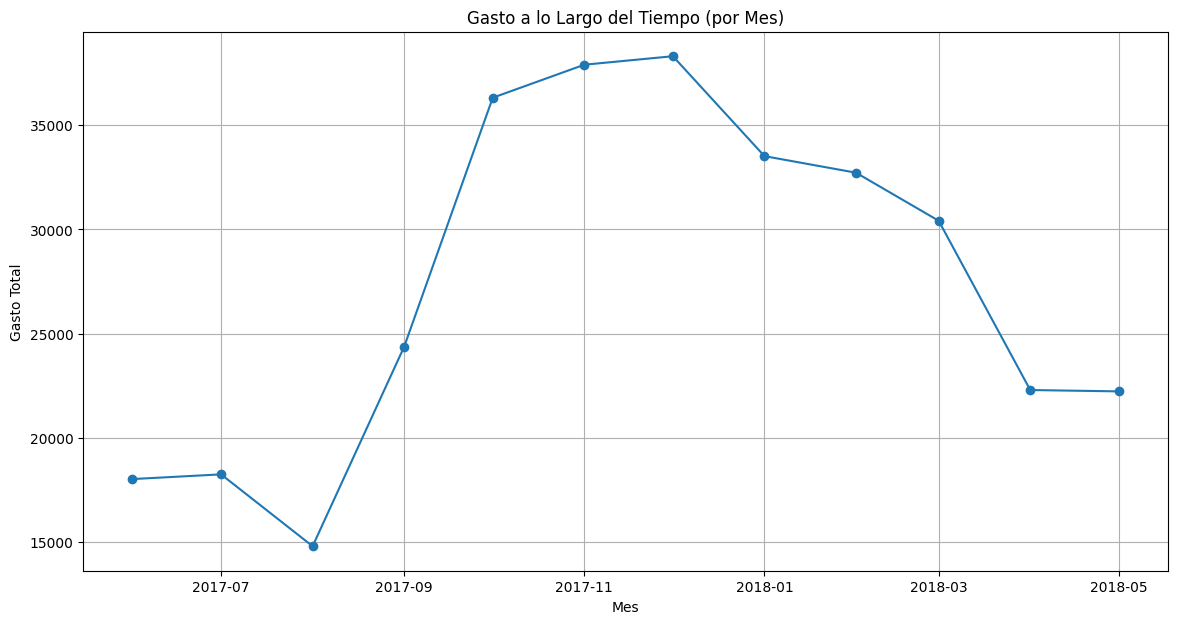

In [51]:
plt.figure(figsize=(14, 7))
plt.plot(cost_by_month['month'], cost_by_month['costs'], marker='o')
plt.title('Gasto a lo Largo del Tiempo (por Mes)')
plt.xlabel('Mes')
plt.ylabel('Gasto Total')
plt.grid(True)
plt.show()

# Hallazgos

**Evolución del Gasto:**

- El gráfico muestra la evolución del gasto en marketing a lo largo del tiempo desde junio de 2017 hasta mayo de 2018.
- Se pueden identificar picos y caídas en el gasto mensual, lo cual puede estar relacionado con campañas de marketing específicas, eventos estacionales o cambios en la estrategia de marketing.

**Picos de Gasto:**

- Los picos significativos en el gasto pueden indicar periodos en los que se realizaron campañas de marketing más intensivas o se invirtió más en publicidad.
- Por ejemplo, los meses de octubre, noviembre y diciembre de 2017 muestran picos de gasto, lo que puede estar relacionado con campañas de fin de año o promociones especiales.

**Tendencia General:**

- A partir de enero de 2018, se observa una tendencia a la disminución del gasto en marketing.
- Esto puede indicar una reevaluación de la estrategia de marketing, un enfoque en la optimización del gasto o una reducción en la inversión publicitaria.

## **Conclusión y Recomendaciones para los Expertos de Marketing**

**Resumen del Análisis**

Después de analizar los datos de visitas, ventas y gastos de marketing de Y.Afisha, hemos obtenido información valiosa sobre el comportamiento de los usuarios y la efectividad de las estrategias de marketing. A continuación, se presentan las recomendaciones basadas en los hallazgos clave.

**Fuentes/Plataformas Recomendadas**

1. **Fuente 6:**

- **Métrica Clave:** Sticky Factor (DAU/WAU) y (DAU/MAU)
- **Por Qué:** Fuente 6 tiene un Sticky Factor excepcionalmente alto, lo que indica que todos los usuarios atraídos por esta fuente regresan diariamente. Esto sugiere una alta lealtad y retención de usuarios.

2.**Fuente 7:**

- **Métrica Clave:** Sticky Factor (DAU/WAU) y (DAU/MAU)
- **Por Qué:** Fuente 7 también muestra un Sticky Factor elevado, lo que indica una alta frecuencia de retorno semanal y mensual. Esta fuente es efectiva en mantener a los usuarios comprometidos con el servicio.

3. **Fuente 3 y Fuente 4:**

- **Métrica Clave:** Usuarios Únicos Diarios (DAU), Semanales (WAU) y Mensuales (MAU)
- **Por Qué:** Estas fuentes tienen consistentemente altos valores de usuarios únicos diarios, semanales y mensuales, lo que indica que son efectivas en atraer una gran cantidad de usuarios.

**Inversión Recomendada**

1. **Mantener o Aumentar la Inversión en Fuente 6 y Fuente 7:**

- **Razón:** Las métricas de retención y lealtad son excepcionalmente altas, lo que sugiere que estos usuarios no solo visitan el sitio web frecuentemente sino que también son más propensos a realizar compras recurrentes.

2. **Optimizar la Inversión en Fuente 3 y Fuente 4:**

- **Razón:** Aunque estas fuentes atraen a muchos usuarios, es importante evaluar el retorno de inversión (ROMI) y el costo de adquisición de clientes (CAC) para asegurarse de que sean sostenibles y rentables.

3. **Reevaluar Fuentes con Menor Retención:**

- **Fuentes:** Fuentes 1, 2, 5, 9 y 10
- **Razón:** Estas fuentes muestran valores más bajos en las métricas de Sticky Factor, lo que indica una menor lealtad y retorno de los usuarios. Es recomendable reevaluar las estrategias de marketing para estas fuentes y considerar reducir la inversión si no se observan mejoras.

**Consideraciones Finales**
- **Optimización del Gasto:** Es crucial seguir monitoreando las métricas clave como DAU, WAU, MAU, Sticky Factor y LTV para ajustar las estrategias de marketing y optimizar el gasto.
- **Estacionalidad:** Considerar los picos de gasto en marketing durante meses específicos (como octubre a diciembre) que han mostrado ser efectivos en atraer y retener usuarios.
- **Retención de Usuarios:** Implementar estrategias de retención y reactivación de usuarios, especialmente para aquellos provenientes de fuentes con menor Sticky Factor, para mejorar la lealtad y el valor de vida del cliente (LTV).

## **Conclusión**

Basado en el análisis de las métricas de uso, ventas y gastos de marketing, se recomienda focalizar las inversiones en fuentes que demuestran alta retención y lealtad de usuarios, como las Fuentes 6 y 7. 

Al mismo tiempo, optimizar y reevaluar las inversiones en fuentes con menor rendimiento puede ayudar a maximizar el retorno de inversión y mejorar la efectividad de las estrategias de marketing.